In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='paper', font_scale=2)
red, blue, green = sns.color_palette('Set1', 3)
from simulation import *
from plots import *

red, blue, green = sns.color_palette('Set1', 3)

Xue 2016 suggests that the stable $pi_A$ distribution should solve the following equation (eq. [S6] in Xue 2016):

$$
x = p \frac{\omega_A x}{\omega_A x + \omega_B (1-x)} + (1-p) \frac{\omega_B x}{\omega_B x + \omega_S (1-x)}
$$

In [19]:
import sympy
sympy.init_printing()

In [20]:
x, p, wA, wB = sympy.symbols('x p wA wB')

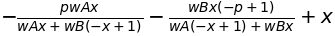

In [21]:
exp = x - p * wA * x / (wA * x + wB * (1-x)) - (1-p) * wB * x / (wB * x + wA * (1-x))
exp

In [22]:
sympy.solveset(exp, x)

⎧      p⋅wA + p⋅wB - wB⎫   ⎧   wA      -wB  ⎫
⎨0, 1, ────────────────⎬ \ ⎨───────, ───────⎬
⎩          wA - wB     ⎭   ⎩wA - wB  wA - wB⎭

Which means that for $0 < p < 1$, 
$$
\pi_A^* = \frac{p \omega_A - (1-p) \omega_B}{\omega_A-\omega_B}
$$
is the stable distribution.

In [23]:
def sol(p, wA, wB):
    return (p * wA - (1-p) * wB)/(wA - wB)
print('{:.3f}, {:.3f}'.format(sol(0.7, 2.0, 0), sol(0.7, 2.0, 0.2)))

0.700, 0.744


First, let's look focus on a scenario where the environment is drawn every generation with 70% for being A and 30% for being B.

In [7]:
N=100000
n=1000
η=0.1
μ=0
ω0=2
ω1=0.2
π0=0.5

burnin = 100

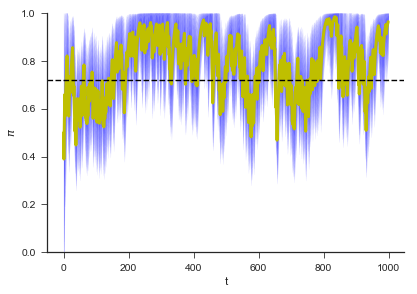

In [8]:
fig, ax = plt.subplots()

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π = simulation(N, n, 0.1, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax)

In [9]:
π[burnin:].mean(), (ϵ[burnin:]==0).mean()

We see that the average $\pi_A$ is **above** the environment empirical probability for being A.

This seems to be a general result (see multiple simulations results in [simulation.ipynb](/notebooks/Milpitas/simulation.ipynb#Same-figure)).

Does this deviance from the optimal strategy depend on $\eta$? The approximation in Xue 2016 eq. [3] indeed depends on $\eta << 1$.

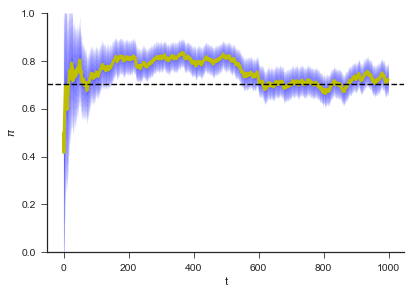

In [10]:
fig, ax = plt.subplots()

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π = simulation(N, n, 0.01, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax)

In [11]:
π[burnin:].mean(), (ϵ[burnin:]==0).mean()

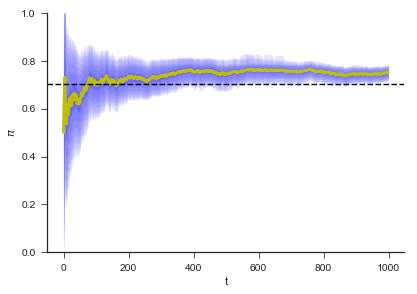

In [12]:
fig, ax = plt.subplots()

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π = simulation(N, n, 0.001, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax)

In [13]:
π[burnin:].mean(), (ϵ[burnin:]==0).mean()

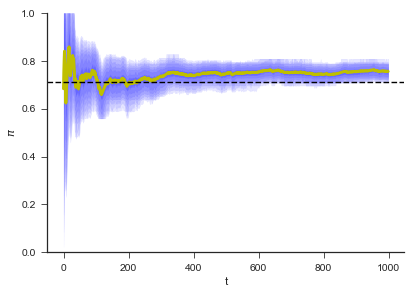

In [14]:
fig, ax = plt.subplots()

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π = simulation(N, n, 0, μ, ω0, ω1, 0.7, ϵ)
plot_π(π, ϵ, ax=ax)

In [15]:
π[0:].mean(), (ϵ[0:]==0).mean()

So we would like to plot the difference between the average phenotye ($\hat{\pi_A}$) and the optimal strategy ($\hat{\epsilon}$) for different value of $\eta$.

I ran a bunch of simulations:
```
python simulation.py --Ne 100000 --n 500 --η1 η --ω0 2.0 --ω1 ω1  --π0 0.5  --env A --reps 10 --cpus 3
```

where `η` is 0, 0.0001, 0.001, 0.01, 0.02, 0.03, ..., 0.09, 0.1, 1.0 and `ω1` in 0, 0.2.

In [ ]:
df = load_simulations('output', False, False)
df.head()

,ID,N,env,n,t,ε,η1,η2,κ,μ1,μ2,π,π0,ω0,ω1
0,2017-01-08T12-25-28.320459,100000,A,500,0,0.0,0.1,None,0.0,0.0,None,0.500878,0.5,2.0,0.2
1,2017-01-08T12-25-28.320459,100000,A,500,1,1.0,0.1,None,0.0,0.0,None,0.611972,0.5,2.0,0.2
2,2017-01-08T12-25-28.320459,100000,A,500,2,0.0,0.1,None,0.0,0.0,None,0.496010,0.5,2.0,0.2
3,2017-01-08T12-25-28.320459,100000,A,500,3,0.0,0.1,None,0.0,0.0,None,0.585276,0.5,2.0,0.2
4,2017-01-08T12-25-28.320459,100000,A,500,4,1.0,0.1,None,0.0,0.0,None,0.653763,0.5,2.0,0.2


In [ ]:
fig, axes = plt.subplots(2, len(df['η1'].unique()), sharex=True, sharey=True, figsize=(18, 8))

for η, ax in zip(sorted(df['η1'].unique()), axes[0,:]):
    df[(df['η1']==η) & (df['ω1']==0.2)].groupby('ID').plot('t', 'π', color='k', alpha=0.1, ax=ax)
    ax.axhline(sol(0.7, 2.0, 0.2), lw=3, color=red, ls='-')
    ax.axhline(0.7, lw=3, color=blue, ls='--')
    ax.legend().set_visible(False)
    ax.set_title('η={:.2g}'.format(η))
for η, ax in zip(sorted(df['η1'].unique()), axes[1,:]):
    df[(df['η1']==η) & (df['ω1']==0.0)].groupby('ID').plot('t', 'π', color='k', alpha=0.1, ax=ax)
    ax.axhline(sol(0.7, 2.0, 0), lw=3, color=red, ls='-')
    ax.axhline(0.7, lw=3, color=blue, ls='--')
    ax.legend().set_visible(False)
    ax.set_title('η={:.2g}'.format(η))
axes[0, 0].set(
    ylim=(0.4, 1),
    xlabel=('t'),
    ylabel='$\bar{\pi}_A'
)
axes[0, 0].set_ylabel('ω1=0.2')
axes[1, 0].set_ylabel('ω1=0.0')

sns.despine()
fig.savefig('figures/bethedging_timeseries.pdf')

In [ ]:
_df = df[df['t'] > 250].copy()

fig, axes = plt.subplots(2, len(_df['η1'].unique()), sharex=False, sharey=False, figsize=(18, 6))

for η, ax in zip(sorted(_df['η1'].unique()), axes[0,:]):
    sns.distplot(_df.loc[(_df['η1']==η) & (_df['ω1']==0.2), 'π'], kde=False, color='k', ax=ax, hist_kws=dict(normed=True))
    ax.axvline(sol(0.7, 2.0, 0.2), lw=1, color=red, ls='-')
    ax.axvline(0.7, lw=1, color=blue, ls='--')
    ax.set(
        title=('η={:.2g}'.format(η)),
        ylabel='',
        xlabel='',
        yticks=[]
    )
for η, ax in zip(sorted(_df['η1'].unique()), axes[1,:]):
    sns.distplot(_df.loc[(_df['η1']==η) & (_df['ω1']==0.0), 'π'], kde=False, color='k', ax=ax, hist_kws=dict(normed=True))
    ax.axvline(sol(0.7, 2.0, 0), lw=1, color=red, ls='-')
    ax.axvline(0.7, lw=1, color=blue, ls='--')
    ax.set(
        title=('η={:.2g}'.format(η)),
        ylabel='',
        xlabel='',
        yticks=[]
    )
axes[0, 0].set_ylabel('ω1=0.2')
axes[1, 0].set_ylabel('ω1=0.0')
fig.tight_layout()
sns.despine()
fig.savefig('figures/bethedging_histograms.pdf')

# Is it an optimal strategy?

We saw that $\pi^*=\frac{p \omega_A - (1-p)\omega_B}{\omega_A - \omega_B}$ is the steady strategy. But is it optimal? The authors suggest that it is because it maximizes the asymptote growth rate (Eq. 11). 

For this we run a simulation with $\eta=0$ and starting with an equal amount of all $\pi$ values (a uniform initial distribution of $\pi$ values) and check which $\pi$ values "wins".

In [9]:
N=100000
n=2000
η=0
μ=0
ω0=2
π0=lambda N: np.repeat(np.linspace(0, 1, N//100), 100)

In [10]:
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π1 = simulation(N, n, η, μ, ω0, 0, π0, ϵ)
π2 = simulation(N, n, η, μ, ω0, 0.2, π0, ϵ)

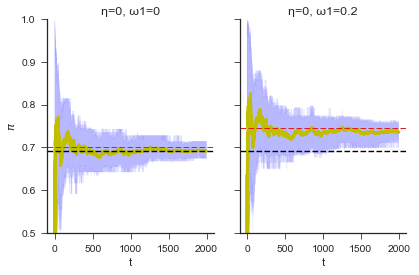

In [16]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
plot_π(π1, ϵ, bands=3, ax=ax[0])
plot_π(π2, ϵ, bands=3, ax=ax[1])
ax[0].set(
    title='η=0, ω1=0',
    ylim=(0.5, 1)
)
ax[1].set(
    title='η=0, ω1=0.2',
    ylabel='',
    ylim=(0.5, 1)
)
ax[0].axhline(0.7, lw=1, color=red, ls='--')
ax[1].axhline(sol(0.7, 2.0, 0.2), lw=1, color=red, ls='--')
fig.tight_layout()
sns.despine()
fig.savefig('figures/bethedging_competitions.pdf')